# San Francisco crime analysis during summer months
## Objective

Based on criminal incident data from San Francisco given analysis is an attempt to answer following questions:
* How how do incidents vary month to month in the Summer 2014 dataset?
* How do incidents vary by time of day? Which incidents are most common in the evening?
* How do incidents vary by neighborhood?

## Results
trtrt

## Details
### Data preparation
Before plotting the data few data preparation and preliminary analysys steps are performed as below:

At first, lets read original CSV file and reduce number of columns to those that are used in this particular analysis:

In [35]:
# Read original CSV file
options(warn=-1)

sf_raw <- read.csv("/Users/philip/projects/datasci_course_materials/assignment6/sanfrancisco_incidents_summer_2014.csv")
# Import "dplyr" for convenient relational algebra operations over dataframes 
library("dplyr")
# Reduce number of columns used for crime analysis 
sf_crimes <- select(sf_raw, Category, Date, Time, X, Y)

Now, lets leave categories with most frequent offences and remove all others. Here we use 1000 as a threshold for total number crimes in a category. 

In [36]:
# Analyse total number of offences in each category 
categories <- table(sf_crimes$Category)
# Remove any categories with total number of crimes less than 1000, so we look only at the most frequent offences
significant_categories <- names(categories[-which(categories  < 1000)]) 
sf_significant_crimes <- droplevels(sf_crimes[sf_crimes$Category %in% significant_categories, ])
table(sf_significant_crimes$Category)


       ASSAULT  DRUG/NARCOTIC  LARCENY/THEFT MISSING PERSON   NON-CRIMINAL 
          2882           1345           9466           1266           3023 
OTHER OFFENSES SUSPICIOUS OCC  VEHICLE THEFT       WARRANTS 
          3567           1300           1966           1782 

Also, lets convert date and time into appropriate format

In [37]:
# Apply data conversions to original dataset
util.convert <- function(df) {
  df$Date <- as.Date(df$Date, '%m/%d/%Y') 
  df$Time <- as.POSIXct(df$Time, format = "%H:%M")
  df$Hour <- as.numeric(format(df$Time, format="%H"))
  return (df)
}

sf_significant_crimes <- util.convert(sf_significant_crimes)

Finally, we're going to group records by Hour of the Day and Category for answering the second question

In [38]:
# Group data by time and gategory
sf_grp_hour_cat <- group_by(sf_significant_crimes, Hour, Category)
sf_grp_hour_cat <- summarise(sf_grp_hour_cat, Count = n())

### Data visualization
#### In order to answer the first question, lets have a look at crime distribution over summer months

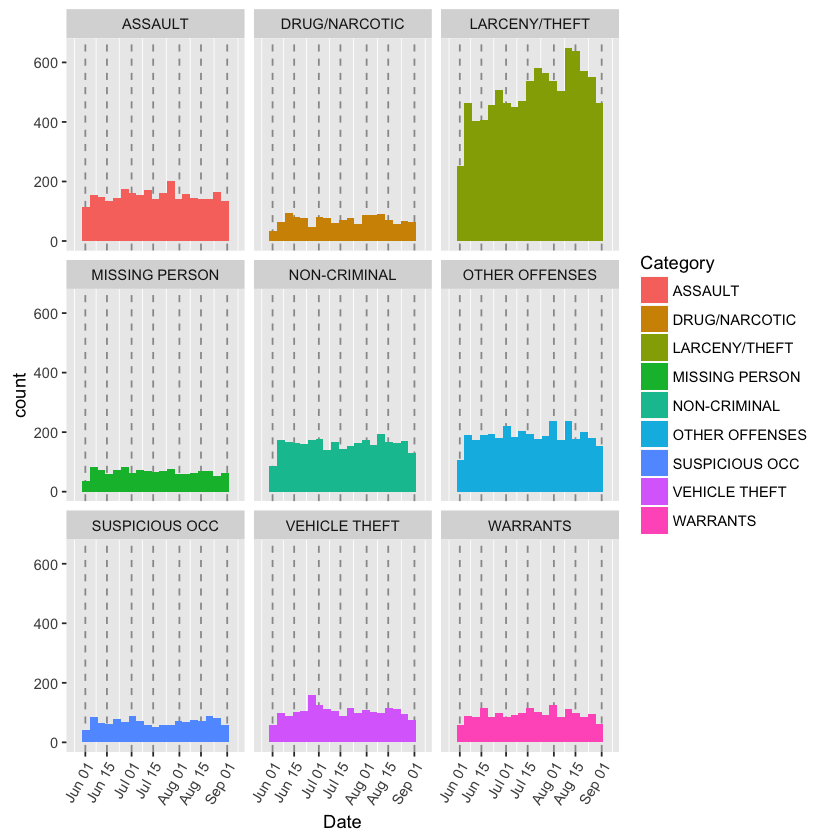

In [39]:
# Plot data distrubution over summber months
library("ggplot2")
qplot(Date, data = sf_significant_crimes, geom = "histogram", fill = Category, binwidth = 5) +  facet_wrap( ~ Category) + theme(axis.text.x = element_text(angle=60, hjust=1),
                                                                           panel.grid.major.y = element_blank(),
                                                                           panel.grid.minor.y = element_blank(),
                                                                           panel.grid.major.x = element_line(colour="grey60", linetype="dashed"))

By looking at graphs above, we can make a conclusion that <i>during summer months number of LARCENY/THEFT offences are constantly increasing with a peak around mid of August. Also number VEHICLE THEFT crimes have a slight increase around end on June, otherwise nomber of other offences have more or less even distribution over sumer months</i>.

#### To answer the second question, lets look at distribution of average number of crimes during the day

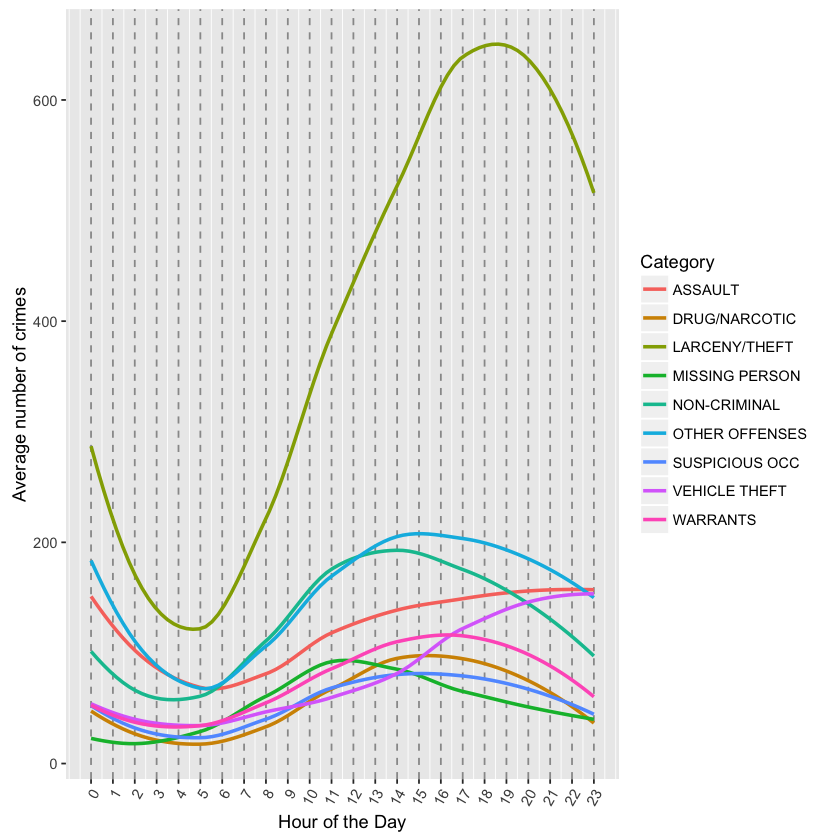

In [41]:
qplot(Hour, Count, data = sf_grp_hour_cat, geom = "smooth", color = Category, se = FALSE) + 
  scale_x_continuous(breaks = seq(0, 23, by = 1), ) +
  labs(x = "Hour of the Day", y = "Average number of crimes") +
  theme(axis.text.x = element_text(angle=60, hjust=1),
       panel.grid.major.y = element_blank(),
       panel.grid.minor.y = element_blank(),
       panel.grid.major.x = element_line(colour="grey60", linetype="dashed"))


Apparently, as we can see <i>number of all types of crimes tend to have a minimum around 5am. Most frequent crime in the evening is LARCENY/THEFT with a peak around 6pm</i>. Also <i>ASSAULTs and VEHICLE THEFTs are increasing ovenight with peaks around midnight</i>.   